# Moyenne du nombre de téléchargements par catégorie d\'applications

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('../../data/googleplaystore.csv')

## Supprimer les lignes où la colonne "Installs" contient la valeur "Free"

In [93]:
df = df[df['Installs'] != 'Free']

# Nettoyage des données d'installations en supprimant le symbole "+"

In [94]:
# Convertir les nombres d'installations en valeurs numériques
df['Installs'] = df['Installs'].str.replace('[\+,]', '', regex=True).astype(int)

## Calculer le nombre total de téléchargements par catégorie

In [95]:
total_downloads_by_category = df.groupby('Category')['Installs'].sum().sort_values()

## Calculer le nombre total d'applications par catégorie

In [96]:
total_apps_by_category = df['Category'].value_counts()

## Calculer la moyenne des téléchargements par catégorie

In [97]:
average_downloads_by_category = total_downloads_by_category / total_apps_by_category

## Trier les catégories d'applications par ordre croissant de moyenne de téléchargements

In [98]:
average_downloads_by_category = average_downloads_by_category.sort_values(ascending=True)

## Créer un graphe histogramme

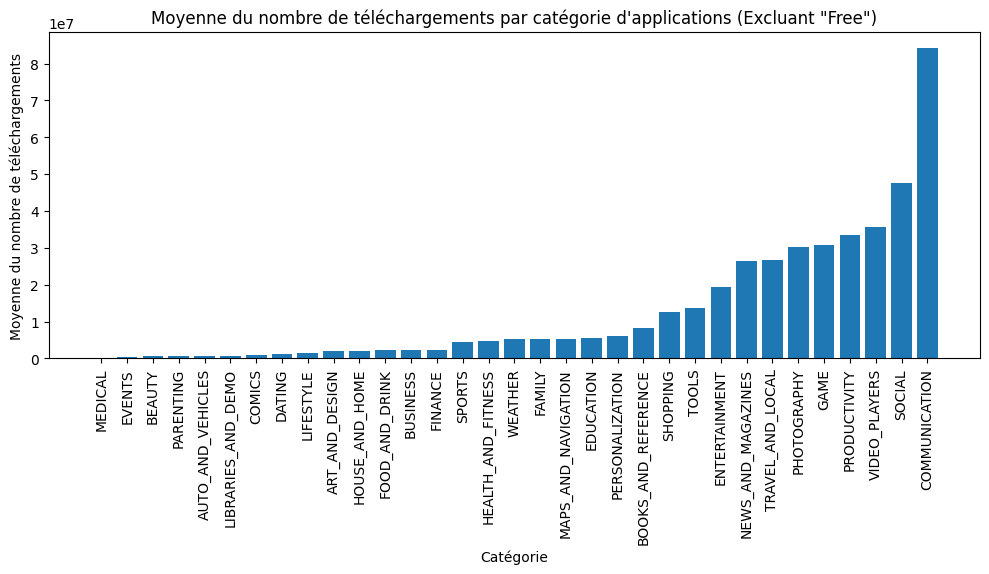

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(average_downloads_by_category.index, average_downloads_by_category)
plt.title('Moyenne du nombre de téléchargements par catégorie d\'applications (Excluant "Free")')
plt.xlabel('Catégorie')
plt.ylabel('Moyenne du nombre de téléchargements')
plt.xticks(rotation=90)  # Rotation des étiquettes sur l'axe des x pour plus de lisibilité
plt.tight_layout()  # Ajuster automatiquement la disposition pour éviter que les étiquettes ne se chevauchent
plt.show()